<a href="https://colab.research.google.com/github/finesketch/deep_learning/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/Course3_Part3_Lesson2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-30 04:13:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-11-30 04:13:30 (130 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)

In [5]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(
    training_padded,
    training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4601 - accuracy: 0.7689 - val_loss: 0.3971 - val_accuracy: 0.8198
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3566 - accuracy: 0.8365 - val_loss: 0.3835 - val_accuracy: 0.8210
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3341 - accuracy: 0.8497 - val_loss: 0.3758 - val_accuracy: 0.8284
Epoch 4/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3173 - accuracy: 0.8590 - val_loss: 0.3749 - val_accuracy: 0.8295
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3084 - accuracy: 0.8606 - val_loss: 0.3883 - val_accuracy: 0.8265
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 0.3018 - accuracy: 0.8658 - val_loss: 0.3800 - val_accuracy: 0.8295
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 0.2956 - accuracy: 0.8698 - val_loss: 0.3942 - val_accuracy: 0.8250

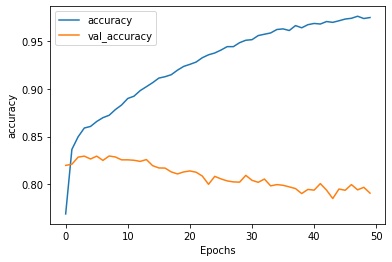

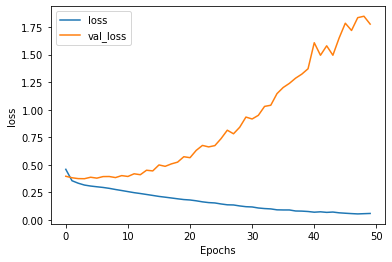

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
model.save('test.h5')